<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/5_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D1%8F%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Методы регуляризации и оптимизации в нейронных сетях

#1. **Дропаут (Dropout)**  
Дропаут — это метод регуляризации, используемый в нейронных сетях для предотвращения переобучения. Идея метода заключается в случайном "отключении" (занулении) части нейронов во время обучения с определённой вероятностью $p$. Это позволяет снизить коадаптацию нейронов, то есть их чрезмерную зависимость друг от друга, что способствует повышению обобщающей способности модели.  

а) **Прямой и обратный проход через линейный слой с Dropout**  
Рассмотрим линейный слой с функцией активации $f$. Пусть на вход подаётся наблюдение $h_1$ размерности $[1 \times d]$. Тогда выход слоя вычисляется по формуле:  
$$
h_2 = f(h_1 \cdot W + b),
$$  
где $W$ — матрица весов размерности $[d \times k]$, $b$ — вектор смещений размерности $[1 \times k]$, а $h_2$ — выходной вектор размерности $[1 \times k]$.  

Для применения дропаута каждый нейрон отключается с вероятностью $p$. Это реализуется путём поэлементного умножения выходного вектора $h_2$ на вектор $d$ размерности $[1 \times k]$, где каждый элемент $d_j$ имеет распределение Бернулли:  
$$
d_j =
\begin{cases}
0, & \text{с вероятностью } p, \\
1, & \text{с вероятностью } 1 - p.
\end{cases}
$$  
Обозначив поэлементное умножение через $\odot$, получим:  
$$
h_2 = d \odot f(h_1 \cdot W + b).
$$  
Если на вход подаётся матрица $H_1$ размерности $[n \times d]$, то выход слоя с дропаутом вычисляется как:  
$$
H_2 = D \odot f(H_1 \cdot W + b),
$$  
где $D$ — матрица размерности $[n \times k]$, состоящая из нулей и единиц, сгенерированных по распределению Бернулли.  

Без дропаута шаг обратного распространения ошибки (backpropagation) выглядит следующим образом:  
$$
\frac{\partial L}{\partial H_1} = \frac{\partial L}{\partial H_2} \cdot W^T \odot f'(H_1 \cdot W + b),
$$  
где $\frac{\partial L}{\partial H_1}$ — градиент по входу слоя, $\frac{\partial L}{\partial H_2}$ — градиент по выходу слоя, а $f'$ — производная функции активации.  

Для слоя с дропаутом шаг обратного распространения ошибки модифицируется следующим образом:  
$$
\frac{\partial L}{\partial H_1} = \frac{\partial L}{\partial H_2} \cdot W^T \odot f'(H_1 \cdot W + b) \odot D.
$$  
Таким образом, градиенты по отключённым нейронам зануляются, и сеть игнорирует их при обновлении параметров.  

Производная по весам слоя вычисляется как:  
$$
\frac{\partial L}{\partial W} = H_1^T \cdot \frac{\partial L}{\partial H_1},
$$  
и именно на эту величину выполняется шаг градиентного спуска.  

б) **Роль Dropout в предотвращении переобучения**  
Дропаут помогает бороться с переобучением за счёт предотвращения коадаптации нейронов. При обучении случайное отключение части нейронов приводит к тому, что оставшиеся нейроны вынуждены учиться более независимо, что снижает риск переобучения на конкретных признаках.  

Кроме того, дропаут можно интерпретировать как усреднение множества различных моделей, получаемых путём случайного отключения нейронов. Это эквивалентно обучению ансамбля из $2^N$ моделей, где $N$ — количество нейронов, которые могут быть отключены.  

в) **Применение Dropout на этапе тестирования**  
На этапе тестирования дропаут не применяется, так как это может привести к нестабильности предсказаний. Вместо этого используется масштабирование выходов нейронов на коэффициент $1 - p$, чтобы сохранить ожидаемое значение выхода.  

Рассмотрим пример с двумя нейронами, каждый из которых отключается с вероятностью $0.4$.




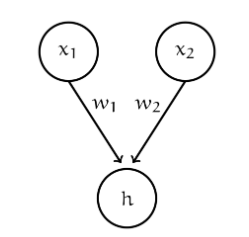

 Пусть выходы нейронов равны $x_1$ и $x_2$, а их веса — $w_1$ и $w_2$. Тогда ожидаемое значение выхода $h$ вычисляется как:  
$$
E(h) = 0.6 \cdot 0.6 \cdot (w_1 \cdot x_1 + w_2 \cdot x_2) + 0.6 \cdot 0.4 \cdot (w_1 \cdot x_1) + 0.4 \cdot 0.6 \cdot (w_2 \cdot x_2) + 0.4 \cdot 0.4 \cdot 0 = 0.6 \cdot (w_1 \cdot x_1 + w_2 \cdot x_2).
$$  
Таким образом, для получения корректного результата на этапе тестирования достаточно умножить выходы нейронов на $0.6$.  

г) **Обратный дропаут (Inverted Dropout)**  
Обратный дропаут — это модификация метода, при которой выходы нейронов на этапе обучения масштабируются на коэффициент $\frac{1}{1 - p}$. Это позволяет избежать необходимости масштабирования на этапе тестирования. Прямой проход при обратном дропауте выглядит следующим образом:  
$$
H_2 = \frac{1}{1 - p} \cdot D \odot f(H_1 \cdot W + b).
$$  
При этом на этапе тестирования выходы нейронов используются без дополнительного масштабирования:  
$$
H_2 = f(H_1 \cdot W + b).
$$  
Такой подход упрощает реализацию и снижает вероятность ошибок при переходе между этапами обучения и тестирования.


д) **Шаг градиентного спуска для линейного слоя с обратным дропаутом и без него**  
Для линейного слоя без дропаута производная по весам $W$ вычисляется следующим образом:  
$$
\frac{\partial L}{\partial W} = H_1^T \cdot \frac{\partial L}{\partial H_1},
$$  
где $H_1$ — входные данные, $\frac{\partial L}{\partial H_1}$ — градиент по выходу слоя. Шаг градиентного спуска для обновления весов выглядит как:  
$$
W_t = W_{t-1} - \eta_t \cdot \frac{\partial L}{\partial W}(W_{t-1}),
$$  
где $\eta_t$ — скорость обучения на шаге $t$.  

При использовании обратного дропаута формула для шага градиентного спуска модифицируется:  
$$
W_t = W_{t-1} - \eta_t \cdot \frac{1}{1 - p} \cdot \frac{\partial L}{\partial W}(W_{t-1}).
$$  
Таким образом, скорость обучения дополнительно масштабируется на коэффициент $\frac{1}{1 - p} \geq 1$. Это приводит к увеличению величины шага градиентного спуска, что может ускорить процесс обучения, но также требует осторожности в выборе скорости обучения $\eta_t$, чтобы избежать нестабильности.  

е) **Вероятность отключения всего слоя и параметры дропаута**  
Пусть на слое имеется $k$ нейронов, каждый из которых отключается с вероятностью $p$. Вероятность того, что весь слой будет отключён, равна $p^k$.  

Рассмотрим случайную величину $N$, которая обозначает количество включённых нейронов. Каждый нейрон включается с вероятностью $1 - p$, поэтому математическое ожидание $N$ вычисляется как:  
$$
E(N) = E(Y_1 + \dots + Y_k) = (1 - p) \cdot k,
$$  
где $Y_i$ — индикаторная случайная величина, равная 1, если $i$-й нейрон включён, и 0 в противном случае.  

Дисперсия $N$ для биномиального распределения равна:  
$$
\text{Var}(N) = k \cdot p \cdot (1 - p).
$$  

Если требуется оставить четверть работающих нейронов, то $E(N) = \frac{k}{4}$. Подставляя в формулу математического ожидания, получаем:  
$$
(1 - p) \cdot k = \frac{k}{4} \implies p = 0.75.
$$  

ё) **Вероятность отключения хотя бы одного слоя в сети**  
Пусть нейронная сеть состоит из трёх слоёв с количеством нейронов $k_1$, $k_2$ и $k_3$ соответственно. Вероятность отключения каждого слоя равна $p^{k_1}$, $p^{k_2}$ и $p^{k_3}$.  

Вероятность того, что ни один из слоёв не отключится, вычисляется как:  
$$
q = (1 - p^{k_1}) \cdot (1 - p^{k_2}) \cdot (1 - p^{k_3}).
$$  
Тогда вероятность того, что хотя бы один слой отключится, равна:  
$$
1 - q.
$$  

ж) **Влияние дропаута на нормализацию данных и метод Alpha Dropout**  
Функция активации SELU (Scaled Exponential Linear Unit) обладает свойством самонормализации: при правильной инициализации весов выход линейного слоя с SELU имеет нулевое среднее и единичную дисперсию. Однако добавление дропаута нарушает это свойство.  

При использовании обратного дропаута выход слоя масштабируется следующим образом:  
$$
h = \frac{1}{1 - p} \cdot d \cdot x,
$$  
где $d$ — случайная величина, принимающая значение 1 с вероятностью $1 - p$ и 0 с вероятностью $p$, а $x$ — выход нейрона.  

Математическое ожидание $h$ остаётся неизменным:  
$$
E(h) = E\left(\frac{1}{1 - p} \cdot d \cdot x\right) = \frac{1}{1 - p} \cdot E(d) \cdot E(x) = E(x).
$$  

Однако дисперсия изменяется:  
$$
\text{Var}(h) = \text{Var}\left(\frac{1}{1 - p} \cdot d \cdot x\right) = \frac{1}{(1 - p)^2} \cdot \text{Var}(d) \cdot \text{Var}(x) = \frac{p}{1 - p} \cdot \text{Var}(x).
$$  

Для сохранения нормализации данных предлагается метод Alpha Dropout. В этом методе выход нейрона заменяется на $\alpha'$ (константа, зависящая от параметров SELU) с вероятностью $p$. Формула для Alpha Dropout выглядит следующим образом:  
$$
d(t) =
\begin{cases}
h, & \text{с вероятностью } 1 - p, \\
\alpha', & \text{с вероятностью } p.
\end{cases}
$$  

Для сохранения нулевого математического ожидания и единичной дисперсии выход масштабируется и сдвигается:  
$$
d(t) \cdot a + b,
$$  
где константы $a$ и $b$ выбираются так, чтобы выполнялись условия:  
$$
E(a \cdot (d \cdot x + (1 - d) \cdot \alpha') + b) = 0, \\
\text{Var}(a \cdot (d \cdot x + (1 - d) \cdot \alpha') + b) = 1.
$$  

Решая систему уравнений, получаем:  
$$
a = \left(p + (\alpha')^2 \cdot p \cdot (1 - p)\right)^{-0.5}, \\
b = -\left(p + (\alpha')^2 \cdot p \cdot (1 - p)\right)^{-0.5} \cdot (1 - p) \cdot \alpha'.
$$  

Это преобразование сохраняет эффект разреженности от дропаута и поддерживает нормализацию данных, что особенно важно при использовании функции активации SELU.


#2. Регуляризация

Рассмотрим задачу регрессии, в которой целевая переменная $y$ зависит от признака $x$. Предположим, что зависимость между $y$ и $x$ может быть описана линейной моделью без свободного члена:  
$$y_i = w \cdot x_i,$$  
где $w$ — параметр модели, который необходимо оценить. Если значение $x = 0$, то модель предсказывает $y = 0$, что соответствует условию задачи.

Для оценки параметра $w$ используется целевая функция с L2-регуляризацией:  
$$Q(w) = \frac{1}{n} \sum_{i=1}^n (y_i - w x_i)^2 + \lambda w^2 \to \min_w,$$  
где $\lambda$ — параметр регуляризации, контролирующий степень штрафа за увеличение значения $w$.

### а) Нахождение оптимального $w$ при произвольном $\lambda$

Для нахождения оптимального значения $w$ продифференцируем целевую функцию $Q(w)$ по $w$ и приравняем производную к нулю:  
$$
\frac{dQ(w)}{dw} = \frac{1}{n} \sum_{i=1}^n -2 \cdot (y_i - w x_i) \cdot x_i + 2 \lambda w = 0.
$$  
Упростим выражение:  
$$
\frac{1}{n} \sum_{i=1}^n y_i x_i - w \cdot \frac{1}{n} \sum_{i=1}^n x_i^2 - \lambda w = 0.
$$  
Перенесем слагаемые, содержащие $w$, в одну сторону:  
$$
\frac{1}{n} \sum_{i=1}^n y_i x_i = w \left( \frac{1}{n} \sum_{i=1}^n x_i^2 + \lambda \right).
$$  
Отсюда оптимальное значение $w$ выражается как:  
$$
\hat{w} = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2 + n \lambda}.
$$  

**Интерпретация:**  
С увеличением параметра регуляризации $\lambda$ значение $\hat{w}$ стремится к нулю. Это предотвращает переобучение модели, ограничивая рост коэффициентов. Регуляризация особенно полезна, когда модель слишком сильно подстраивается под данные, что приводит к большим значениям коэффициентов.

### б) Подбор оптимального $\lambda$ с помощью кросс-валидации leave-one-out (LOO)

Кросс-валидация leave-one-out (LOO) заключается в следующем:  
1. На каждом шаге $i$ ($i = 1, 2, \dots, n$) модель обучается на всех наблюдениях, кроме $i$-го.  
2. Затем модель тестируется на $i$-м наблюдении, и вычисляется ошибка предсказания.  
3. После проведения $n$ таких шагов вычисляется средняя ошибка по всем тестовым наблюдениям.  

Оптимальное значение $\lambda$ выбирается как то, которое минимизирует среднюю ошибку:  
$$
\lambda_{\text{CV}} = \arg\min_\lambda \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i^{(-i)})^2,
$$  
где $\hat{y}_i^{(-i)}$ — предсказание модели, обученной на всех наблюдениях, кроме $i$-го.

### в) Нахождение оптимального $w$ при $\lambda_{\text{CV}}$

После нахождения $\lambda_{\text{CV}}$ оптимальное значение $w$ вычисляется по формуле, полученной в пункте (а):  
$$
\hat{w} = \frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n x_i^2 + n \lambda_{\text{CV}}}.
$$  

### г) Ускорение LOO-кросс-валидации для Ridge-регрессии

Для Ridge-регрессии можно избежать необходимости обучать $n$ моделей, используя матричные вычисления. Оптимальные коэффициенты для Ridge-регрессии могут быть выражены в виде:  
$$
\hat{w} = (X^T X + \lambda I)^{-1} X^T y,
$$  
где $X$ — матрица признаков, $y$ — вектор целевых значений, $I$ — единичная матрица.  

С помощью метода шляпных матриц (hat matrix) и свойств линейной алгебры можно вычислить предсказания для каждого наблюдения без повторного обучения модели. Это позволяет значительно ускорить процесс кросс-валидации.

### д) Регуляризация на выходе нейрона в нейронных сетях

Наложение регуляризации на выход нейрона в нейронных сетях используется для следующих целей:  
1. **Контроль переобучения:** Регуляризация ограничивает рост весов, предотвращая излишнюю сложность модели.  
2. **Улучшение обобщающей способности:** Ограничение весов помогает модели лучше работать на новых данных.  
3. **Стабилизация обучения:** Регуляризация может предотвратить взрыв градиентов, что особенно важно в глубоких сетях.  
4. **Интерпретируемость:** Меньшие значения весов могут упростить интерпретацию модели.  

Таким образом, регуляризация на выходе нейрона является важным инструментом для улучшения качества и устойчивости нейронных сетей.

#3. Weight Decay  
В случае $L_2$-регуляризации к базовой функции потерь добавляется дополнительное слагаемое, и вместо функционала  
$$
L(w) = \frac{1}{n} \cdot \sum\limits_{i=1}^{n} \nabla_w L(y_i, x_i, w)
$$  
оптимизируется функционал  
$$
Q_\lambda(w) = L(w) + \frac{1}{2}\lambda \cdot ||w||^2_2,
$$  
где $\lambda$ — параметр регуляризации. Будем считать, что регуляризатор применяется ко всем весам нейронной сети. Обычно регуляризатор добавляется к функции потерь для предотвращения переобучения. Градиентный спуск может быть переписан с учётом регуляризатора в несколько иной форме, которая называется **weight decay**. В современных библиотеках для обучения нейронных сетей у оптимизаторов часто присутствует соответствующий параметр. Рассмотрим переписывание градиентного спуска с учётом регуляризатора для нескольких методов оптимизации.

### а) Momentum-SGD с $L_2$-регуляризацией  
Шаг momentum-SGD с учётом $L_2$-регуляризации может быть выражен в виде:  
$$
w_t = g(\lambda) \cdot w_{t-1} - \eta_t \cdot h(\nabla_w L(w_{t-1})),
$$  
где $\eta_t$ — learning rate на шаге $t$, а $g(\lambda)$ и $h(\cdot)$ — функции, зависящие от параметра регуляризации и градиента соответственно.  

Один шаг momentum-SGD с $L_2$-регуляризацией описывается следующей системой уравнений:  
$$
\begin{cases}
g_t = \nabla_w Q(w_{t-1}) + \lambda \cdot w_{t-1}, \\
m_t = \mu \cdot m_{t-1} + g_t, \\
w_t = w_{t-1} - \eta_t \cdot m_t,
\end{cases}
$$  
где $\mu$ — коэффициент инерции (momentum), а $m_t$ — накопленный градиент.  

Подставив первую строку во вторую, а вторую в третью, получим:  
$$
w_t = w_{t-1} - \eta_t \cdot \left( \mu \cdot m_{t-1} + \nabla_w L(w_{t-1}) + \lambda \cdot w_{t-1} \right) =
$$  
$$
= \underbrace{(1 - \eta_t \cdot \lambda)}_{<1} \cdot w_{t-1} - \eta_t \cdot \left( \mu \cdot m_{t-1} + \nabla_w L(w_{t-1}) \right).
$$  

Таким образом, при добавлении $L_2$-регуляризации каждый шаг градиентного спуска выполняется с учётом сдвига весов на константу, что эквивалентно применению weight decay. Этот параметр часто используется в оптимизаторах для нейронных сетей вместо явной регуляризации.

### б) Adam с $L_2$-регуляризацией  
Шаг Adam с учётом $L_2$-регуляризации может быть выражен в виде:  
$$
w_t = g(\lambda) \cdot w_{t-1} - \eta_t \cdot h(\nabla_w L(w_{t-1})),
$$  
где $g(\lambda)$ и $h(\cdot)$ — функции, зависящие от параметра регуляризации и градиента.  

Один шаг Adam с $L_2$-регуляризацией описывается следующей системой уравнений:  
$$
\begin{cases}
g_t = \nabla_w Q(w_{t-1}) + \lambda \cdot w_{t-1}, \\
m_t = \beta_1 \cdot m_{t-1} + (1-\beta_1) \cdot g_t, \\
v_t = \beta_2 \cdot v_{t-1} + (1-\beta_2) \cdot g_t^2, \\
\hat{m}_t = \frac{1}{1-\beta_1^t} \cdot m_t, \\
\hat{v}_t = \frac{1}{1-\beta_2^t} \cdot v_t, \\
w_t = w_{t-1} - \eta_t \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \varepsilon},
\end{cases}
$$  
где $\beta_1$ и $\beta_2$ — гиперпараметры, контролирующие экспоненциальное затухание для градиента и его квадрата соответственно, а $\varepsilon$ — малая константа для численной стабильности.  

Выполнив подстановки, получим:  
$$
w_t = w_{t-1} - \eta_t \cdot \frac{m_t}{1-\beta_1^t} \cdot \frac{1}{\sqrt{\hat{v}_t} + \varepsilon} =
$$  
$$
= w_{t-1} - \eta_t \cdot \frac{\beta_1 \cdot m_{t-1} + (1-\beta_1) \cdot g_t}{1-\beta_1^t} \cdot \frac{1}{\sqrt{\hat{v}_t} + \varepsilon} =
$$  
$$
= w_{t-1} - \eta_t \cdot \frac{\beta_1 \cdot m_{t-1} + (1-\beta_1) \cdot (\nabla_w Q(w_{t-1}) + \lambda \cdot w_{t-1})}{1-\beta_1^t} \cdot \frac{1}{\sqrt{\hat{v}_t} + \varepsilon} =
$$  
$$
= w_{t-1} \cdot \left( \underbrace{1}_{\text{вектор единиц}} - \frac{\eta_t \cdot \lambda \cdot (1-\beta_1)}{1-\beta_1^t} \cdot \underbrace{\frac{1}{\sqrt{\hat{v}_t} + \varepsilon}}_{(*)} \right) - \dots
$$  

Здесь $(*)$ указывает на то, что регуляризация работает по-разному для различных весов, что может приводить к их неравномерному затуханию. В случае Adam, из-за высокой эффективности оптимизации, существует риск переобучения.  

### в) AdamW  
Для решения проблемы переобучения в Adam была предложена модификация AdamW, в которой weight decay учитывается отдельно от градиента. Уравнения для AdamW имеют вид:  
$$
\begin{cases}
g_t = \nabla_w Q(w_{t-1}), \\
m_t = \beta_1 \cdot m_{t-1} + (1-\beta_1) \cdot g_t, \\
v_t = \beta_2 \cdot v_{t-1} + (1-\beta_2) \cdot g_t^2, \\
\hat{m}_t = \frac{1}{1-\beta_1^t} \cdot m_t, \\
\hat{v}_t = \frac{1}{1-\beta_2^t} \cdot v_t, \\
w_t = (1 - \eta_t \cdot \lambda) \cdot w_{t-1} - \eta_t \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \varepsilon}.
\end{cases}
$$  
В AdamW weight decay применяется непосредственно к весам, что позволяет более эффективно контролировать переобучение.

# 4. Нормализация по батчам (Batch Normalization)

Нормализация по батчам (Batch Normalization, BN) — это мощная техника, которая была предложена для ускорения обучения глубоких нейронных сетей и борьбы с внутренним ковариационным сдвигом (internal covariate shift). Внутренний ковариационный сдвиг возникает, когда распределение входных данных для каждого слоя сети меняется в процессе обучения, что затрудняет настройку параметров и замедляет сходимость. Batch Normalization решает эту проблему путем нормализации активаций каждого слоя по мини-батчам данных.



## Математическая основа Batch Normalization

### 1. Нормализация активаций

Пусть у нас есть мини-батч данных $B = \{x_1, x_2, \dots, x_m\}$, где $m$ — размер батча. Для каждого элемента батча $x_i$ вычисляется его нормализованное значение. Процесс нормализации состоит из следующих шагов:

#### a) Вычисление среднего и дисперсии по батчу

Сначала вычисляется среднее значение $\mu_B$ и дисперсия $\sigma_B^2$ по батчу:

$$
\mu_B = \frac{1}{m} \sum_{i=1}^m x_i
$$

$$
\sigma_B^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2
$$

Здесь:
- $\mu_B$ — среднее значение активаций по батчу,
- $\sigma_B^2$ — дисперсия активаций по батчу.

#### b) Нормализация

Затем каждый элемент батча нормализуется с использованием среднего и дисперсии:

$$
\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \varepsilon}}
$$

Здесь:
- $\hat{x}_i$ — нормализованное значение,
- $\varepsilon$ — малая константа (например, $10^{-5}$), добавленная для численной стабильности (чтобы избежать деления на ноль).

#### c) Масштабирование и сдвиг

После нормализации применяется масштабирование и сдвиг с помощью обучаемых параметров $\gamma$ и $\beta$:

$$
y_i = \gamma \cdot \hat{x}_i + \beta
$$

Здесь:
- $\gamma$ — параметр масштабирования,
- $\beta$ — параметр сдвига.

Эти параметры позволяют сети адаптировать нормализованные значения под конкретные задачи и восстанавливать выразительную способность сети, если нормализация нежелательна.



### 2. Обучение и инференс

#### a) Обучение

Во время обучения среднее $\mu_B$ и дисперсия $\sigma_B^2$ вычисляются для каждого батча. Кроме того, поддерживаются скользящие средние $\mu_{\text{running}}$ и $\sigma^2_{\text{running}}$, которые обновляются после каждого батча:

$$
\mu_{\text{running}} = \alpha \cdot \mu_{\text{running}} + (1 - \alpha) \cdot \mu_B
$$

$$
\sigma^2_{\text{running}} = \alpha \cdot \sigma^2_{\text{running}} + (1 - \alpha) \cdot \sigma_B^2
$$

Здесь $\alpha$ — коэффициент затухания (обычно близкий к 1, например, 0.9).

#### b) Инференс

Во время инференса (тестирования) используются скользящие средние $\mu_{\text{running}}$ и $\sigma^2_{\text{running}}$, а не статистики текущего батча:

$$
\hat{x}_i = \frac{x_i - \mu_{\text{running}}}{\sqrt{\sigma^2_{\text{running}} + \varepsilon}}
$$

$$
y_i = \gamma \cdot \hat{x}_i + \beta
$$



## Пример использования в нейронной сети

Рассмотрим пример использования Batch Normalization в полносвязной нейронной сети. Пусть у нас есть сеть с двумя скрытыми слоями:


In [1]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x


Здесь:
- `fc1`, `fc2`, `fc3` — полносвязные слои,
- `bn1`, `bn2` — слои Batch Normalization, применяемые после каждого полносвязного слоя перед активационной функцией ReLU.


## Преимущества Batch Normalization

1. **Ускорение обучения:** BN позволяет использовать более высокие learning rates, что ускоряет сходимость.
2. **Устойчивость к инициализации весов:** BN делает сеть менее чувствительной к начальной инициализации весов.
3. **Регуляризация:** BN действует как слабый регуляризатор, что может уменьшить необходимость в других методах регуляризации, таких как dropout.


## Недостатки и ограничения

1. **Зависимость от размера батча:** BN требует достаточно большого размера батча для точной оценки среднего и дисперсии. На маленьких батчах это может привести к нестабильности.
2. **Сложность в рекуррентных сетях:** Применение BN в рекуррентных сетях (RNN, LSTM) требует специальных модификаций.
3. **Проблемы с распределенным обучением:** В распределенных системах синхронизация статистик между устройствами может быть сложной.


## Альтернативы Batch Normalization

В случаях, когда Batch Normalization не подходит, могут использоваться альтернативные методы:

1. **Layer Normalization (LN):** Нормализация по слоям, которая нормализует активации по нейронам, а не по батчам.
2. **Instance Normalization (IN):** Нормализация по каждому отдельному примеру, часто используется в задачах генерации изображений.
3. **Group Normalization (GN):** Нормализация по группам нейронов, что может быть полезно при маленьких батчах.

### Пример Layer Normalization



In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.ln1 = nn.LayerNorm(256)
        self.fc2 = nn.Linear(256, 128)
        self.ln2 = nn.LayerNorm(128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.ln1(self.fc1(x)))
        x = torch.relu(self.ln2(self.fc2(x)))
        x = self.fc3(x)
        return x

Таким образом, Batch Normalization — это мощный инструмент для улучшения обучения глубоких нейронных сетей. Она позволяет ускорить сходимость, уменьшить зависимость от инициализации весов и действует как слабый регуляризатор. Однако в некоторых случаях, таких как маленькие батчи или рекуррентные сети, могут потребоваться альтернативные методы нормализации. Понимание математической основы BN помогает эффективно применять эту технику и адаптировать её под конкретные задачи.

# 5. Нормализация VS дропаут  

В обучении нейронных сетей часто возникают проблемы, связанные с внутренним ковариационным сдвигом (internal covariate shift) и переобучением. Для решения этих проблем используются два основных метода: **нормализация** и **дропаут**. Оба метода имеют свои особенности, математические обоснования и области применения. Рассмотрим их подробно.



## 5.1 Нормализация  

Нормализация — это метод, который позволяет стабилизировать распределение входных данных для каждого слоя нейронной сети. Это помогает ускорить обучение и улучшить обобщающую способность модели. Наиболее популярным методом нормализации является **Batch Normalization (BN)**.

### 5.1.1 Batch Normalization  

Batch Normalization работает следующим образом:  
1. Для каждого мини-батча вычисляются среднее значение и дисперсия по каждому признаку.  
2. Данные нормализуются с использованием этих статистик.  
3. Вводятся обучаемые параметры масштаба и сдвига для восстановления выразительности модели.  

Математически это выражается следующим образом:  

1. Вычисление среднего и дисперсии для мини-батча:  
$$
   \mu_B = \frac{1}{m} \sum_{i=1}^m x_i, \quad \sigma_B^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2,
$$  
   где $m$ — размер мини-батча, $x_i$ — входные данные.  

2. Нормализация данных:  
$$
   \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \varepsilon}},
$$  
   где $\varepsilon$ — малая константа для численной стабильности.  

3. Масштабирование и сдвиг:  
$$
   y_i = \gamma \cdot \hat{x}_i + \beta,
$$  
   где $\gamma$ и $\beta$ — обучаемые параметры.  

#### Преимущества Batch Normalization:  
- Ускорение сходимости за счёт стабилизации градиентов.  
- Снижение чувствительности к начальной инициализации весов.  
- Позволяет использовать более высокие learning rates.  

#### Пример:  
Предположим, у нас есть мини-батч из 4 элементов: $x = [1, 2, 3, 4]$.  
1. Вычисляем среднее и дисперсию:  
$$
   \mu_B = \frac{1 + 2 + 3 + 4}{4} = 2.5, \quad \sigma_B^2 = \frac{(1-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 + (4-2.5)^2}{4} = 1.25.
$$  
2. Нормализуем данные:  
$$
   \hat{x}_i = \frac{x_i - 2.5}{\sqrt{1.25 + \varepsilon}}.
$$  
3. Применяем масштабирование и сдвиг:  
$$
   y_i = \gamma \cdot \hat{x}_i + \beta.
$$  



## 5.2 Дропаут  

Дропаут (Dropout) — это метод регуляризации, который случайным образом "отключает" (обнуляет) часть нейронов во время обучения. Это предотвращает переобучение, заставляя сеть учиться более устойчивым признакам.  

### 5.2.1 Математическое описание  

Пусть $p$ — вероятность того, что нейрон останется активным (обычно $p = 0.5$). Тогда для каждого нейрона $x_i$ на этапе обучения:  
$$
x_i' =
\begin{cases}
\frac{x_i}{p}, & \text{с вероятностью } p, \\
0, & \text{с вероятностью } 1-p.
\end{cases}
$$  
На этапе тестирования все нейроны остаются активными, но их выходы умножаются на $p$.  

#### Пример:  
Пусть у нас есть слой из 4 нейронов: $x = [1, 2, 3, 4]$, и $p = 0.5$.  
1. Генерируем маску: $m = [1, 0, 1, 0]$ (случайно отключаем нейроны).  
2. Применяем дропаут:  
$$
   x' = \left[ \frac{1}{0.5}, 0, \frac{3}{0.5}, 0 \right] = [2, 0, 6, 0].
$$  

#### Преимущества дропаута:  
- Эффективно предотвращает переобучение.  
- Прост в реализации и не требует дополнительных параметров.  
- Может использоваться совместно с другими методами регуляризации.  



## 5.3 Сравнение нормализации и дропаута  

| Характеристика          | Нормализация (BN)                     | Дропаут                          |
|-||-|
| **Цель**                | Стабилизация распределения данных     | Предотвращение переобучения      |
| **Принцип работы**      | Нормализация по мини-батчу           | Случайное отключение нейронов    |
| **Параметры**           | $\gamma$, $\beta$             | Вероятность $p$              |
| **Влияние на обучение** | Ускорение сходимости                  | Снижение переобучения            |
| **Применение**          | На каждом слое                       | На скрытых слоях                 |



## 5.4 Совместное использование  

Нормализация и дропаут могут использоваться вместе. Например, в современных архитектурах нейронных сетей (например, ResNet) часто применяется Batch Normalization после каждого свёрточного слоя, а дропаут — в полносвязных слоях.  

### Пример совместного использования:  
1. Применяем Batch Normalization:  
$$
   y_i = \gamma \cdot \hat{x}_i + \beta.
$$  
2. Применяем дропаут:  
$$
   y_i' =
   \begin{cases}
   \frac{y_i}{p}, & \text{с вероятностью } p, \\
   0, & \text{с вероятностью } 1-p.
   \end{cases}
$$  



Таким образом, нормализация и дропаут — это два мощных инструмента, которые решают разные задачи в обучении нейронных сетей. Нормализация стабилизирует распределение данных и ускоряет обучение, а дропаут предотвращает переобучение, добавляя случайность в процесс обучения. Их совместное использование позволяет создавать более устойчивые и эффективные модели.

Реализуем Batch Normalization и Dropout на Python с использованием библиотеки NumPy. Это поможет лучше понять, как эти методы работают на практике.

Реализация Batch Normalization

In [3]:
import numpy as np

class BatchNormalization:
    def __init__(self, epsilon=1e-5, momentum=0.9):
        self.epsilon = epsilon  # Малая константа для численной стабильности
        self.momentum = momentum  # Параметр для скользящего среднего
        self.running_mean = None  # Скользящее среднее для среднего значения
        self.running_var = None  # Скользящее среднее для дисперсии
        self.gamma = None  # Параметр масштаба
        self.beta = None  # Параметр сдвига

    def forward(self, x, training=True):
        if training:
            # Вычисляем среднее и дисперсию по мини-батчу
            mean = np.mean(x, axis=0)
            var = np.var(x, axis=0)

            # Обновляем скользящее среднее
            if self.running_mean is None:
                self.running_mean = mean
                self.running_var = var
            else:
                self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mean
                self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var

            # Нормализация
            x_normalized = (x - mean) / np.sqrt(var + self.epsilon)

            # Инициализация gamma и beta, если они не были инициализированы
            if self.gamma is None:
                self.gamma = np.ones(x.shape[1])
                self.beta = np.zeros(x.shape[1])

            # Масштабирование и сдвиг
            out = self.gamma * x_normalized + self.beta
        else:
            # На этапе тестирования используем скользящее среднее
            x_normalized = (x - self.running_mean) / np.sqrt(self.running_var + self.epsilon)
            out = self.gamma * x_normalized + self.beta

        return out

# Пример использования
x = np.array([[1, 2], [2, 3], [3, 4], [4, 5]], dtype=np.float32)
bn = BatchNormalization()
print("Batch Normalization (Training):")
print(bn.forward(x, training=True))
print("Batch Normalization (Testing):")
print(bn.forward(x, training=False))

Batch Normalization (Training):
[[-1.34163547 -1.34163547]
 [-0.44721183 -0.44721183]
 [ 0.44721183  0.44721183]
 [ 1.34163547  1.34163547]]
Batch Normalization (Testing):
[[-1.34163547 -1.34163547]
 [-0.44721183 -0.44721183]
 [ 0.44721183  0.44721183]
 [ 1.34163547  1.34163547]]


Реализация Dropout

In [4]:
class Dropout:
    def __init__(self, p=0.5):
        self.p = p  # Вероятность того, что нейрон останется активным
        self.mask = None  # Маска для отключения нейронов

    def forward(self, x, training=True):
        if training:
            # Генерируем маску с вероятностью p
            self.mask = (np.random.rand(*x.shape) < self.p) / self.p
            return x * self.mask
        else:
            # На этапе тестирования все нейроны активны
            return x

# Пример использования
x = np.array([[1, 2], [2, 3], [3, 4], [4, 5]], dtype=np.float32)
dropout = Dropout(p=0.5)
print("Dropout (Training):")
print(dropout.forward(x, training=True))
print("Dropout (Testing):")
print(dropout.forward(x, training=False))

Dropout (Training):
[[2. 0.]
 [0. 0.]
 [6. 0.]
 [0. 0.]]
Dropout (Testing):
[[1. 2.]
 [2. 3.]
 [3. 4.]
 [4. 5.]]


Совместное использование Batch Normalization и Dropout

Теперь объединим оба метода в одной модели:

In [5]:
class NeuralNetwork:
    def __init__(self):
        self.bn = BatchNormalization()
        self.dropout = Dropout(p=0.5)

    def forward(self, x, training=True):
        # Применяем Batch Normalization
        x = self.bn.forward(x, training=training)
        # Применяем Dropout
        x = self.dropout.forward(x, training=training)
        return x

# Пример использования
x = np.array([[1, 2], [2, 3], [3, 4], [4, 5]], dtype=np.float32)
model = NeuralNetwork()
print("Neural Network (Training):")
print(model.forward(x, training=True))
print("Neural Network (Testing):")
print(model.forward(x, training=False))

Neural Network (Training):
[[-0.         -0.        ]
 [-0.89442366 -0.89442366]
 [ 0.          0.89442366]
 [ 2.68327093  0.        ]]
Neural Network (Testing):
[[-1.34163547 -1.34163547]
 [-0.44721183 -0.44721183]
 [ 0.44721183  0.44721183]
 [ 1.34163547  1.34163547]]


#6. Инициализация весов

**Важное замечание:**  
Необходимо доработать задачу, связанную с использованием функции активации ReLU. В данном случае рассматривается симметричная функция активации. Для инициализации весов предлагается использовать равномерное распределение:  
$$w_i \sim U\left[-\frac{1}{\sqrt{n_{in}}}, \frac{1}{\sqrt{n_{in}}}\right],$$  
где $n_{in}$ — количество входных нейронов слоя.



### а) Покажите, что это будет приводить к затуханию дисперсии при переходе от одного слоя к другому.

**Решение:**  
Найдём дисперсию веса $w_i$. Для равномерного распределения $U[a, b]$ дисперсия вычисляется по формуле:  
$$\text{Var}(w_i) = \frac{(b - a)^2}{12}.$$  
Подставляя параметры распределения $a = -\frac{1}{\sqrt{n_{in}}}$ и $b = \frac{1}{\sqrt{n_{in}}}$, получаем:  
$$\text{Var}(w_i) = \frac{\left(\frac{1}{\sqrt{n_{in}}} - \left(-\frac{1}{\sqrt{n_{in}}}\right)\right)^2}{12} = \frac{\left(\frac{2}{\sqrt{n_{in}}}\right)^2}{12} = \frac{4}{12 \cdot n_{in}} = \frac{1}{3 \cdot n_{in}}.$$

Рассмотрим линейный слой с симметричной функцией активации. Предполагается, что веса инициализируются независимо друг от друга и от входных данных, а входные данные также независимы. Тогда дисперсия выхода слоя $h_i$ вычисляется следующим образом:  
$$\text{Var}(h_i) = \text{Var}\left(\sum_{i=1}^{n_{in}} w_i x_i\right) = \sum_{i=1}^{n_{in}} \text{Var}(w_i \cdot x_i).$$  
Используя формулу для дисперсии произведения независимых случайных величин, получаем:  
$$\text{Var}(w_i \cdot x_i) = \mathbb{E}^2(x_i) \cdot \text{Var}(w_i) + \text{Var}(x_i) \cdot \mathbb{E}^2(w_i) + \text{Var}(x_i) \cdot \text{Var}(w_i).$$  
Поскольку функция активации симметрична, математическое ожидание входных данных равно нулю: $\mathbb{E}(x_i) = 0$. Также предполагается, что веса инициализируются с нулевым средним: $\mathbb{E}(w_i) = 0$. Тогда формула упрощается:  
$$\text{Var}(w_i \cdot x_i) = \text{Var}(x_i) \cdot \text{Var}(w_i).$$  
Следовательно, дисперсия выхода слоя равна:  
$$\text{Var}(h_i) = \sum_{i=1}^{n_{in}} \text{Var}(x_i) \cdot \text{Var}(w_i) = n_{in} \cdot \text{Var}(x_i) \cdot \text{Var}(w_i).$$  
Подставляя значение $\text{Var}(w_i) = \frac{1}{3 \cdot n_{in}}$, получаем:  
$$\text{Var}(h_i) = n_{in} \cdot \text{Var}(x_i) \cdot \frac{1}{3 \cdot n_{in}} = \frac{1}{3} \cdot \text{Var}(x_i).$$  
Таким образом, дисперсия уменьшается в три раза при переходе от выхода предыдущего слоя к выходу нового слоя.



### б) Какими нужно взять параметры равномерного распределения, чтобы дисперсия не затухала?

**Решение:**  
Для того чтобы дисперсия не затухала, необходимо, чтобы $\text{Var}(h_i) = \text{Var}(x_i)$. Из предыдущего пункта следует, что для этого требуется:  
$$n_{in} \cdot \text{Var}(x_i) \cdot \text{Var}(w_i) = \text{Var}(x_i).$$  
Отсюда получаем условие на дисперсию весов:  
$$\text{Var}(w_i) = \frac{1}{n_{in}}.$$  
Для равномерного распределения $U[a, b]$ дисперсия равна $\frac{(b - a)^2}{12}$. Подставляя $\text{Var}(w_i) = \frac{1}{n_{in}}$, получаем:  
$$\frac{(b - a)^2}{12} = \frac{1}{n_{in}}.$$  
Если выбрать $a = -\sqrt{\frac{3}{n_{in}}}$ и $b = \sqrt{\frac{3}{n_{in}}}$, то:  
$$\frac{\left(\sqrt{\frac{3}{n_{in}}} - \left(-\sqrt{\frac{3}{n_{in}}}\right)\right)^2}{12} = \frac{\left(2 \sqrt{\frac{3}{n_{in}}}\right)^2}{12} = \frac{12}{12 \cdot n_{in}} = \frac{1}{n_{in}}.$$  
Таким образом, подходящее равномерное распределение:  
$$w_i \sim U\left[-\sqrt{\frac{3}{n_{in}}}, \sqrt{\frac{3}{n_{in}}}\right].$$



### в) Инициализация весов из нормального распределения

**Решение:**  
Для нормального распределения $N(\mu, \sigma^2)$ дисперсия равна $\sigma^2$. Чтобы дисперсия не затухала, необходимо, чтобы:  
$$\text{Var}(w_i) = \frac{1}{n_{in}}.$$  
Следовательно, параметры нормального распределения должны быть:  
$$w_i \sim N\left(0, \frac{1}{n_{in}}\right).$$



### г) Компромисс между прямым и обратным распространением ошибки

**Решение:**  
При прямом распространении ошибки на вход нейрона поступает $n_{in}$ слагаемых, а при обратном распространении — $n_{out}$ градиентов. Количество весов между слоями может значительно варьироваться, что приводит к невозможности одновременно поддерживать неизменными дисперсии при прямом и обратном распространении.  

Для компромисса предлагается инициализировать веса из распределения с дисперсией, учитывающей как количество входных, так и выходных нейронов:  
$$\text{Var}(w_i) = \frac{2}{n_{in} + n_{out}}.$$  
Такая инициализация называется **инициализацией Ксавие (Xavier)** или **инициализацией Глорота (Glorot)**. Она позволяет балансировать дисперсию при прямом и обратном распространении ошибки.  

Для нормального распределения:  
$$w_i \sim N\left(0, \frac{2}{n_{in} + n_{out}}\right).$$  
Для равномерного распределения:  
$$w_i \sim U\left[-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}}\right].$$  



[1] Glorot, X., & Bengio, Y. (2010). Understanding the difficulty of training deep feedforward neural networks. In *Proceedings of the Thirteenth International Conference on Artificial Intelligence and Statistics* (pp. 249–256).

Реализация инициализации весов на Python с использованием библиотеки `numpy` может быть выполнена следующим образом. Мы рассмотрим инициализацию весов для равномерного и нормального распределений, а также инициализацию Ксавие (Xavier/Glorot).


### 1. Инициализация весов из равномерного распределения

Для равномерного распределения $U[-a, a]$, где $a = \frac{1}{\sqrt{n_{in}}}$:



In [6]:
import numpy as np

def uniform_initialization(n_in, n_out):
    """
    Инициализация весов из равномерного распределения.

    Параметры:
    n_in (int): Количество входных нейронов.
    n_out (int): Количество выходных нейронов.

    Возвращает:
    weights (np.ndarray): Матрица весов формы (n_in, n_out).
    """
    a = 1 / np.sqrt(n_in)  # Параметр для равномерного распределения
    weights = np.random.uniform(-a, a, size=(n_in, n_out))
    return weights


### 2. Инициализация весов из нормального распределения

Для нормального распределения $N(0, \frac{1}{n_{in}})$:


In [7]:
def normal_initialization(n_in, n_out):
    """
    Инициализация весов из нормального распределения.

    Параметры:
    n_in (int): Количество входных нейронов.
    n_out (int): Количество выходных нейронов.

    Возвращает:
    weights (np.ndarray): Матрица весов формы (n_in, n_out).
    """
    std_dev = 1 / np.sqrt(n_in)  # Стандартное отклонение
    weights = np.random.normal(0, std_dev, size=(n_in, n_out))
    return weights


### 3. Инициализация Ксавие (Xavier/Glorot)

Для инициализации Ксавие используется компромисс между количеством входных и выходных нейронов. Дисперсия весов выбирается как $\frac{2}{n_{in} + n_{out}}$.

#### а) Для нормального распределения:


In [8]:
def xavier_normal_initialization(n_in, n_out):
    """
    Инициализация Ксавие (Xavier) с нормальным распределением.

    Параметры:
    n_in (int): Количество входных нейронов.
    n_out (int): Количество выходных нейронов.

    Возвращает:
    weights (np.ndarray): Матрица весов формы (n_in, n_out).
    """
    std_dev = np.sqrt(2 / (n_in + n_out))  # Стандартное отклонение
    weights = np.random.normal(0, std_dev, size=(n_in, n_out))
    return weights


#### б) Для равномерного распределения:


In [9]:
def xavier_uniform_initialization(n_in, n_out):
    """
    Инициализация Ксавие (Xavier) с равномерным распределением.

    Параметры:
    n_in (int): Количество входных нейронов.
    n_out (int): Количество выходных нейронов.

    Возвращает:
    weights (np.ndarray): Матрица весов формы (n_in, n_out).
    """
    limit = np.sqrt(6 / (n_in + n_out))  # Границы распределения
    weights = np.random.uniform(-limit, limit, size=(n_in, n_out))
    return weights


### 4. Пример использования


In [10]:
# Параметры слоя
n_in = 100  # Количество входных нейронов
n_out = 50  # Количество выходных нейронов

# Инициализация весов
weights_uniform = uniform_initialization(n_in, n_out)
weights_normal = normal_initialization(n_in, n_out)
weights_xavier_normal = xavier_normal_initialization(n_in, n_out)
weights_xavier_uniform = xavier_uniform_initialization(n_in, n_out)

# Проверка формы матрицы весов
print("Uniform Initialization Shape:", weights_uniform.shape)
print("Normal Initialization Shape:", weights_normal.shape)
print("Xavier Normal Initialization Shape:", weights_xavier_normal.shape)
print("Xavier Uniform Initialization Shape:", weights_xavier_uniform.shape)

Uniform Initialization Shape: (100, 50)
Normal Initialization Shape: (100, 50)
Xavier Normal Initialization Shape: (100, 50)
Xavier Uniform Initialization Shape: (100, 50)



### 5. Проверка дисперсии

Для проверки дисперсии весов можно использовать следующий код:


In [11]:
def check_variance(weights):
    """
    Проверка дисперсии весов.

    Параметры:
    weights (np.ndarray): Матрица весов.

    Возвращает:
    variance (float): Дисперсия весов.
    """
    return np.var(weights)

# Проверка дисперсии для каждого метода инициализации
print("Uniform Initialization Variance:", check_variance(weights_uniform))
print("Normal Initialization Variance:", check_variance(weights_normal))
print("Xavier Normal Initialization Variance:", check_variance(weights_xavier_normal))
print("Xavier Uniform Initialization Variance:", check_variance(weights_xavier_uniform))

Uniform Initialization Variance: 0.003266599757793463
Normal Initialization Variance: 0.010020046718884046
Xavier Normal Initialization Variance: 0.012923777250064506
Xavier Uniform Initialization Variance: 0.013435334909320308


### 6. Результаты

- Для равномерной инициализации дисперсия будет близка к $\frac{1}{3 \cdot n_{in}}$.
- Для нормальной инициализации дисперсия будет близка к $\frac{1}{n_{in}}$.
- Для инициализации Ксавие дисперсия будет близка к $\frac{2}{n_{in} + n_{out}}$.

Эти методы инициализации помогают избежать проблем с затуханием или взрывом градиентов при обучении нейронных сетей.